In [26]:
import sys 
sys.path.append("..")
import matplotlib.pyplot as plt

from fastpm.force.kernels import gradient, laplace
from src.egd import PGD, EGD

import numpy as np
import pandas as pd

import pmesh

from scipy.interpolate import interp1d

from nbodykit.lab import FFTPower
from nbodykit.source.catalog.file import BigFileCatalog

fastpm_tng_seed = BigFileCatalog(
    "/pscratch/sd/b/bthorne/fairuniverse/hsc_dataset/fastpm_box704/TNG_new_n4/Om_0.3089_S8_0.8159_0.2494",
    dataset="1"
)
fastpm_tng_seed.attrs["Nmesh"] = 256
gamma = 1.1
beta = 1.
EGD(fastpm_tng_seed, gamma, beta)


/pscratch/sd/b/bthorne/conda/simulation/lib/python3.7/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


AttributeError: 'numpy.complex128' object has no attribute 'x'

In [27]:
fastpm_tng_seed["Position"].attrs

{}

In [5]:
baryon_power_spectra_path = "/global/homes/b/bthorne/projects/berkeley/FAIR-Universe/baryon-power-spectra/logPkRatio/logPkRatio_TNG100.dat"
Tb_TNG100 = pd.read_csv(baryon_power_spectra_path, sep='\s+')
Tb_TNG100

,logk,z371,z349,z328,z290,z244,z210,z174,z141,z104,z070,z035,z018,z000
0,-3.301030,0.000000e+00,0.000000e+00,0.000000e+00,-2.569129e-26,0.000000e+00,-5.138258e-26,-1.027652e-25,-2.055303e-25,-4.110607e-25,0.000000e+00,-8.221214e-25,0.000000e+00,0.000000e+00
1,-3.164079,6.206257e-10,5.475229e-10,4.466361e-10,5.405100e-10,1.108093e-09,2.273162e-09,4.440284e-09,6.805686e-09,1.014725e-08,1.431205e-08,1.984453e-08,2.117875e-08,2.338748e-08
2,-3.027129,2.052288e-10,1.810552e-10,1.476939e-10,1.787361e-10,3.664248e-10,7.516903e-10,1.468316e-09,2.250508e-09,3.355500e-09,4.732717e-09,6.562200e-09,7.003400e-09,7.733786e-09
3,-2.890178,-1.246191e-09,-1.099403e-09,-8.968267e-10,-1.085322e-09,-2.225005e-09,-4.564414e-09,-8.915906e-09,-1.366553e-08,-2.037526e-08,-2.873800e-08,-3.984699e-08,-4.252604e-08,-4.696110e-08
4,-2.753228,-1.686399e-09,-1.487760e-09,-1.213625e-09,-1.468704e-09,-3.010973e-09,-6.176761e-09,-1.206539e-08,-1.849279e-08,-2.757269e-08,-3.888950e-08,-5.392266e-08,-5.754808e-08,-6.354978e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,3.130864,5.373991e-01,5.535576e-01,7.680480e-01,7.955329e-01,1.134641e+00,1.118823e+00,1.180108e+00,1.310323e+00,1.584307e+00,1.705023e+00,1.811097e+00,1.689401e+00,1.583102e+00
321,3.142171,5.429954e-01,5.591406e-01,7.758015e-01,8.034085e-01,1.146328e+00,1.130252e+00,1.192250e+00,1.324029e+00,1.601343e+00,1.723786e+00,1.831965e+00,1.709131e+00,1.602041e+00
322,3.153477,5.486209e-01,5.647519e-01,7.835943e-01,8.113231e-01,1.158075e+00,1.141738e+00,1.204454e+00,1.337806e+00,1.618468e+00,1.742648e+00,1.852948e+00,1.728970e+00,1.621088e+00
323,3.164784,5.542757e-01,5.703915e-01,7.914265e-01,8.192769e-01,1.169883e+00,1.153283e+00,1.216719e+00,1.351652e+00,1.635682e+00,1.761610e+00,1.874047e+00,1.748919e+00,1.640242e+00


In [6]:

# TNG redshifts copied from baryon-power-spectra
redshifts = np.array([3.71,3.49,3.28,2.90,2.44,2.1,1.74,1.41,1.04,0.7,0.35,0.18,0.0])
redshift_columns = [f"z{redshift:.2f}".replace(".", "") for redshift in redshifts]
print(redshift_columns)

['z371', 'z349', 'z328', 'z290', 'z244', 'z210', 'z174', 'z141', 'z104', 'z070', 'z035', 'z018', 'z000']


In [7]:
new_redshifts = [0.2, 0.7]
new_redshift_columns = [f"z{redshift:.2f}".replace(".", "") for redshift in new_redshifts]
# Interpolating for each row (power spectrum at a given scale) across redshifts
for new_redshift in new_redshifts:
    new_column = []
    for index, row in Tb_TNG100.iterrows():
        #redshifts = list(df.columns)
        power_values = row[redshift_columns].values
        interpolator = interp1d(redshifts, power_values, kind='linear')  # You can also try other kinds like 'cubic'
        interpolated_value = interpolator(new_redshift)
        new_column.append(interpolated_value)
    Tb_TNG100[f"z{new_redshift:.2f}".replace(".", "") ] = new_column


In [8]:
Tb_TNG100

,logk,z371,z349,z328,z290,z244,z210,z174,z141,z104,z070,z035,z018,z000,z020
0,-3.301030,0.000000e+00,0.000000e+00,0.000000e+00,-2.569129e-26,0.000000e+00,-5.138258e-26,-1.027652e-25,-2.055303e-25,-4.110607e-25,0.0,-8.221214e-25,0.000000e+00,0.000000e+00,-9.672015958280184e-26
1,-3.164079,6.206257e-10,5.475229e-10,4.466361e-10,5.405100e-10,1.108093e-09,2.273162e-09,4.440284e-09,6.805686e-09,1.014725e-08,1.4312050964165862e-08,1.984453e-08,2.117875e-08,2.338748e-08,2.102178086825898e-08
2,-3.027129,2.052288e-10,1.810552e-10,1.476939e-10,1.787361e-10,3.664248e-10,7.516903e-10,1.468316e-09,2.250508e-09,3.355500e-09,4.73271675988161e-09,6.562200e-09,7.003400e-09,7.733786e-09,6.951493876514882e-09
3,-2.890178,-1.246191e-09,-1.099403e-09,-8.968267e-10,-1.085322e-09,-2.225005e-09,-4.564414e-09,-8.915906e-09,-1.366553e-08,-2.037526e-08,-2.8738002612852755e-08,-3.984699e-08,-4.252604e-08,-4.696110e-08,-4.22108609752323e-08
4,-2.753228,-1.686399e-09,-1.487760e-09,-1.213625e-09,-1.468704e-09,-3.010973e-09,-6.176761e-09,-1.206539e-08,-1.849279e-08,-2.757269e-08,-3.8889503983163295e-08,-5.392266e-08,-5.754808e-08,-6.354978e-08,-5.712155671163033e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,3.130864,5.373991e-01,5.535576e-01,7.680480e-01,7.955329e-01,1.134641e+00,1.118823e+00,1.180108e+00,1.310323e+00,1.584307e+00,1.705023369194472,1.811097e+00,1.689401e+00,1.583102e+00,1.7037185499867744
321,3.142171,5.429954e-01,5.591406e-01,7.758015e-01,8.034085e-01,1.146328e+00,1.130252e+00,1.192250e+00,1.324029e+00,1.601343e+00,1.723785917877431,1.831965e+00,1.709131e+00,1.602041e+00,1.7235817584184074
322,3.153477,5.486209e-01,5.647519e-01,7.835943e-01,8.113231e-01,1.158075e+00,1.141738e+00,1.204454e+00,1.337806e+00,1.618468e+00,1.742648217973625,1.852948e+00,1.728970e+00,1.621088e+00,1.7435555482044616
323,3.164784,5.542757e-01,5.703915e-01,7.914265e-01,8.192769e-01,1.169883e+00,1.153283e+00,1.216719e+00,1.351652e+00,1.635682e+00,1.7616102694830524,1.874047e+00,1.748919e+00,1.640242e+00,1.7636399193449341


(-0.4, 0.9)

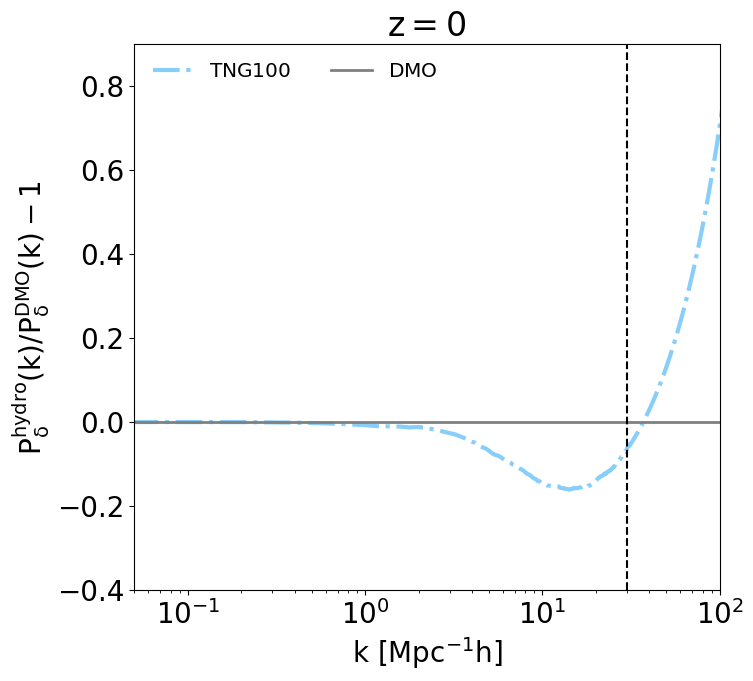

In [9]:
title=r'$\mathrm{z=0}$'
colz = "z000"

fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.158 ,0.11,0.813,0.84])

ax1.plot(10**Tb_TNG100['logk'], 10**Tb_TNG100[colz] - 1, label=r'$\mathrm{TNG100}$', color="lightskyblue", lw=3, ls='-.')

ax1.axhline(y=0, color='gray', linestyle='-', label=r'$\mathrm{DMO}$', lw=2)
ax1.axvline(x=30, color='k', linestyle='--')


ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax1.set_ylabel(r'$\mathrm{P_{\delta}^{hydro}(k)/P_{\delta}^{DMO}(k)-1}$')
ax1.set_title(title)

ax1.set_xlim(0.05,100)
 
ax1.legend(loc="best",prop={'size': 14.5},ncol=2,frameon=False)
ax1.set_ylim(-0.4,0.9)

In [10]:
redshifts = np.array([0.0, 0.5, 1.0, 2.0, 3.0])
Omega_m = 0.3089
S8 = 0.8159

In [11]:
frac = 0.01
subsample_fpm = fastpm_tng_seed[:int(len(fastpm_tng_seed) * frac)]
subsample_fpm.attrs["Nmesh"] = 512

/pscratch/sd/b/bthorne/conda/simulation/lib/python3.7/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


In [12]:
from nbodykit.source.catalog import ArrayCatalog

In [14]:
from pmesh.pm import ParticleMesh
from fastpm.force.kernels import gradient, laplace
from nbodykit.cosmology import Planck15
kl = 0.1 
ks = 2
alpha = 0.1
fastpm_tng_seed.attrs["Nmesh"] = 128
cat = fastpm_tng_seed
fpm = None
Omega_m0 = 0.2726

if fpm is None:
    B = np.ceil(2. * cat.attrs['BoxSize'] * ks / (2. * np.pi * cat.csize ** (1./3.)))
    mask = B < 1
    B[mask] = 1
    fpm = ParticleMesh(Nmesh=B*cat.attrs['Nmesh'], BoxSize=cat.attrs['BoxSize'], comm=cat.comm, resampler='tsc')


In [15]:

nbar = 1.0 * cat.csize / fpm.Nmesh.prod()
H0 = 100.

X = cat['Position'].compute() 
X[...] %= cat.attrs['BoxSize']

layout = fpm.decompose(X)
X1 = layout.exchange(X)


In [16]:
rho = fpm.create(type="real") 

In [17]:
rho.paint(X1, hold=False)
rho[...] /= nbar # 1 + delta

/pscratch/sd/b/bthorne/conda/simulation/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Use ParticleMesh.paint instead
  """Entry point for launching an IPython kernel.


In [18]:
delta_k = rho.r2c(out=Ellipsis)

In [24]:
delta_k.apply(laplace, out=Ellipsis)

AttributeError: 'numpy.complex128' object has no attribute 'x'

In [17]:
pot_k = delta_k.apply(egd.shortrange(kl, ks), out=Ellipsis)

AttributeError: 'numpy.complex128' object has no attribute 'x'

In [16]:
pot_k = delta_k.apply(egd.shortrangePM(X1, delta_k, kl, ks, factor=1.5 * Omega_m0), out=Ellipsis)

AttributeError: 'numpy.complex128' object has no attribute 'x'

In [15]:
pot_k = delta_k.apply(egd.laplace, out=Ellipsis)


AttributeError: 'numpy.complex128' object has no attribute 'x'

In [28]:
S = alpha / H0**2 * layout.gather(egd.shortrangePM(X1, delta_k, kl, ks, factor=1.5 * Omega_m0))

AttributeError: 'numpy.complex128' object has no attribute 'x'

In [22]:
egd_subsample_fmp = egd.PGD(fastpm_tng_seed, 0.1, 0.1, 2)

AttributeError: 'numpy.complex128' object has no attribute 'x'

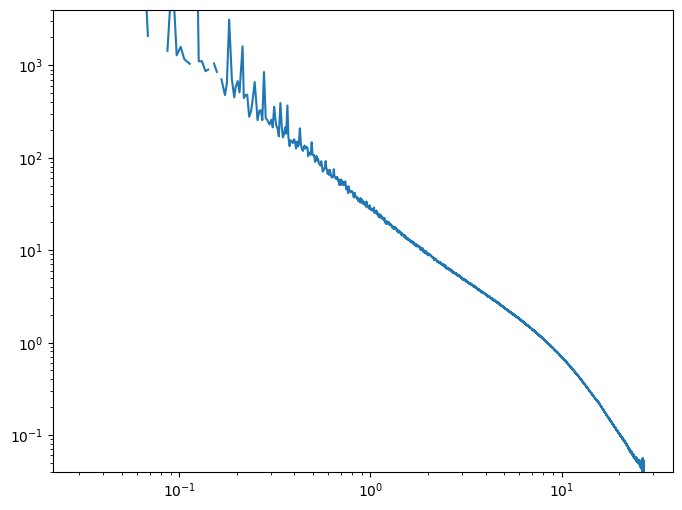

In [52]:
Nmeshs = [1024]
kmax = 50
kmin = 0.01

fig, ax = plt.subplots(figsize=(8, 6))
for Nmesh in Nmeshs:
    result = FFTPower(subsample_fpm, mode="1d", Nmesh=Nmesh, dk=0.005, kmin=kmin, kmax=kmax)
    result.save("Pk_Nmesh_{Nmesh}.json".format(Nmesh=Nmesh))
    Pk = result.power
    ax.loglog(
        Pk["k"],
        Pk["power"].real - Pk.attrs["shotnoise"],
        label=r"Nmesh={Nmesh}".format(Nmesh=Nmesh),
    )
    ax.set_ylim(4e-2, 4e3)